# Assignment 4 - Machine Learning

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [12]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [53]:
#Brian Conway
#CS 411 Assignment 4 Machine Learning
#Prof Kamile Samara, Spring 2021ww


df = pd.read_csv('fraud_data.csv', usecols=['Class'])

def answer_one(df):
#adds up all the zero and 1 columns into y, makes x equal to the number of columns
    x=0
    y=0
    while (x<len(df)):
        y=y+df.iloc[x]
    
        x=x+1
    
#divides y by x, names it z, which then equals the percent of fraud in the db
    z=(y/x)*100
    # Your code here
    
    return z # Returns z
#calls the function on the df to prove the answer is correct
print(answer_one(df))


Class    1.641082
dtype: float64


In [97]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split


df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [72]:
def answer_two(df):
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    
    #Make and train the dummy classifier
    dummy_classifier = DummyClassifier(strategy="most_frequent")
    dummy_classifier.fit(X_train, y_train)
    
    #Score the classifier it gets high marks, naturally
    accuracy_score=dummy_classifier.score(X_train,y_train)
    recall_score=recall_score(y_train,y_train)
    # Your code here
    #return the dummy scores
    return accuracy_score,recall_score # Return your answer
#prove the code works
print(answer_two(df))

(0.9830352203577356, 1.0)


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [115]:

def answer_three(df):
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    
    #make the classifier
    clf = SVC()
    #train it
    clf.fit(X_train, y_train)
    #make the predictions
    predictions = clf.predict(X_test)
    #Score them all 3 ways the question wants
    accuracy_score = clf.score(X_test, y_test)
    recall_score = recall_score(y_test, predictions)
    precision_score = precision_score(y_test, predictions)
    #return the scores
    return accuracy_score, recall_score, precision_score# Return your answer
#prove that the code works.
print(answer_three(df))

(0.9900442477876106, 0.35, 0.9333333333333333)


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [117]:
def answer_four(df):
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    #make the classifier with the question specs
    clf = SVC(C=1e9, gamma=1e-07)
    #train it
    clf.fit(X_train, y_train)
    #score it and make the matrix (NOT THE KEANU REEVES MOVIE)
    y_scores = clf.decision_function(X_test) > -220
    confusion_matrix = confusion_matrix(y_test, y_scores)
    #Return it
    return confusion_matrix # Return your answer
#Prove it works
print(answer_four(df))
    


[[5320   24]
 [  14   66]]


### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-149-94db723e4607>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


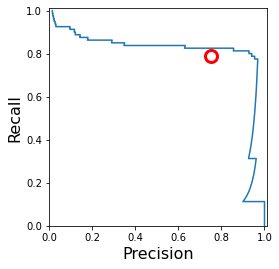

<ipython-input-149-94db723e4607>:44: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


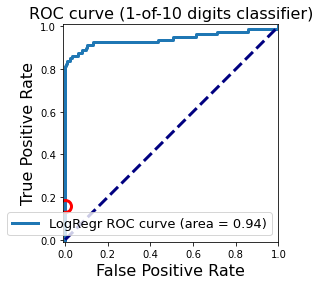

(0, 0.7875)


In [149]:
def answer_five(df):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt

    #makes the classifier
    clf=LogisticRegression()
    #train it
    clf.fit(X_train, y_train)
    #score it
    y_scores = clf.decision_function(X_test)

    #set up the model of the data
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    #precision=0.75
    closest_zero = np.argmin(np.abs(thresholds))
    #set the closest zero to the precision value the question wants on the axis.
    closest_zero_p = 0.75
    #Get the recall based on it
    recallInProb = recall[closest_zero]
    
    #make the prc curve
    plt.figure()
    #set axis limits
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    #plot it
    plt.plot(precision, recall, label='Precision-Recall Curve')
    #set up a visual marker for the data we want
    plt.plot(closest_zero_p, recallInProb, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    #label it
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    plt.axes().set_aspect('equal')
    #show it
    plt.show()
    
    #set up the data for the roc curve, false positive and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    #make a new figure for the roc curve
    plt.figure()
    #set axis limits
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    #plot the data
    plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    #label the axes and title
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #set up the visual marker of the data we want, the y axis value is obviously 0 so can hardcode that
    plt.plot(0, 0.16, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.axes().set_aspect('equal')
    #show the roc curve
    plt.show()

        
    # Your code here
    #return the data we want
    return 0, recallInProb# Return your answer
print(answer_five(df))

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [147]:
def answer_six(df):    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    #make clf a logistic regression
    clf = LogisticRegression()
    #Values from the question
    grid_vals = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

    #Make a grid search object
    grid_search = GridSearchCV(clf, param_grid=grid_vals, scoring='recall')
    #train it
    grid_search.fit(X_train, y_train)
    #results
    cv_result = grid_search.cv_results_
    mean_test_score = cv_result['mean_test_score']

    numpy_array = np.array(mean_test_score).reshape(5,2)
    
    return numpy_array # Return your answer

#print statement to test
print(answer_six(df))
#If I'm understanding the error code correctly, code is working as intended, the data in the set just doesn't have some of the values
#So it's returning a 5x2 array with one of the columns NaN values.

C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_m

C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

[[       nan 0.79337662]
 [       nan 0.81149351]
 [       nan 0.80798701]
 [       nan 0.81155844]
 [       nan 0.80422078]]


C:\Users\Phillip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
